# DMSP Particle Precipitate Flux Prediction (Mesoscale)


## Import Dependencies and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

%matplotlib inline

In [2]:
# takes about 75 seconds
df = pd.read_csv('AI_Ready_DMSP_Data.csv')

## EDA

In [3]:
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945887 entries, 0 to 1945886
Columns: 154 entries, Datetimes to newell_5min
dtypes: float64(153), object(1)
memory usage: 2.2+ GB


In [5]:
# df.describe().T

In [6]:
df.select_dtypes(include='object')

,Datetimes
0,1987-01-12 12:57:00
1,1987-01-12 12:58:00
2,1987-01-12 13:01:00
3,1987-01-12 13:02:00
4,1987-01-12 13:03:00
...,...
1945882,2014-12-31 22:50:00
1945883,2014-12-31 22:51:00
1945884,2014-12-31 22:52:00
1945885,2014-12-31 22:53:00


In [7]:
print("Target variable is")
df['ELE_TOTAL_ENERGY_FLUX'].head()

Target variable is


0    2.057827e+08
1    2.509837e+08
2    4.469146e+08
3    1.934849e+10
4    3.913337e+11
Name: ELE_TOTAL_ENERGY_FLUX, dtype: float64

<AxesSubplot:>

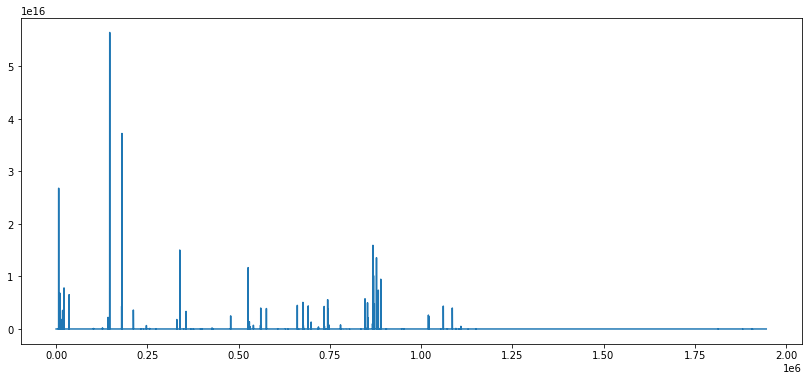

In [8]:
plt.figure(figsize=(14,6))
df['ELE_TOTAL_ENERGY_FLUX'].plot()

In [9]:
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

# Preprocessing

In [10]:
df['Datetimes'] = pd.to_datetime(df['Datetimes'])

In [11]:
X = df.drop(['ELE_TOTAL_ENERGY_FLUX', 'Datetimes'], axis=1)
y = df['ELE_TOTAL_ENERGY_FLUX']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

152

In [18]:
print(X.shape)
print(y.reshape(-1,1).shape)

(1945887, 152)
(1945887, 1)


In [13]:
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
# X_test = scaler.transform(X_test)

In [19]:
scaler2 = StandardScaler()
y = scaler2.fit_transform(y.reshape(-1,1))
# y_test = scaler.transform([y_test])

In [20]:
print(X.shape)
print(y.shape)

(1945887, 152)
(1945887, 1)


## Create NN model

In [21]:
# instantiate the model
model = Sequential()
# create the model
model.add(Dense(100, input_dim=152, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15300     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 21,651
Trainable params: 21,651
Non-trainable params: 0
____________________________________________________

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='min')

In [24]:
# X_train = np.asarray(X_train).astype('float32')
# X_test = np.asarray(X_test).astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model.fit(X_train, y_train, batch_size=64, callbacks=[early_stop], epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
21284/21284 [==============================] - 44s 2ms/step - loss: 3.1644e-04 - mean_absolute_error: 0.0028 - mean_squared_error: 3.1644e-04 - val_loss: 9.8854e-12 - val_mean_absolute_error: 3.1441e-06 - val_mean_squared_error: 9.8854e-12
Epoch 2/50
21284/21284 [==============================] - 33s 2ms/step - loss: 3.4218e-09 - mean_absolute_error: 1.4956e-05 - mean_squared_error: 3.4218e-09 - val_loss: 5.7349e-12 - val_mean_absolute_error: 2.3949e-06 - val_mean_squared_error: 5.7349e-12
Epoch 3/50
21284/21284 [==============================] - 40s 2ms/step - loss: 1.1477e-09 - mean_absolute_error: 1.0465e-05 - mean_squared_error: 1.1477e-09 - val_loss: 6.0162e-15 - val_mean_absolute_error: 7.7572e-08 - val_mean_squared_error: 6.0162e-15
Epoch 4/50
21284/21284 [==============================] - 38s 2ms/step - loss: 9.9454e-10 - mean_absolute_error: 9.5129e-06 - mean_squared_error: 9.9454e-10 - val_loss: 8.6640e-22 - val_mean_absolute_error: 2.9435e-11 - val_mean_squared_er

KeyboardInterrupt: 

In [26]:
predictions = model.predict(X_test)

In [27]:
scaler2.inverse_transform(predictions)

array([[-1.1256989e-09],
       [-1.1256989e-09],
       [-1.1256989e-09],
       ...,
       [-1.1256989e-09],
       [-1.1256989e-09],
       [-1.1256989e-09]], dtype=float32)

In [30]:
df['ELE_TOTAL_ENERGY_FLUX']

0          2.057827e+08
1          2.509837e+08
2          4.469146e+08
3          1.934849e+10
4          3.913337e+11
               ...     
1945882    2.231577e+08
1945883    3.074197e+08
1945884    1.917582e+08
1945885    2.265864e+08
1945886    1.160843e+09
Name: ELE_TOTAL_ENERGY_FLUX, Length: 1945887, dtype: float64

In [31]:
scaler2.n_features_in_

1

In [32]:
predictions.shape

(583767, 1)

In [33]:
y.shape

(1945887, 1)

In [34]:
X.shape

(1945887, 152)

In [35]:
y.T.shape

(1, 1945887)